In [1]:
# Import python libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the Udemy Courses csv file
df = pd.read_csv("udemy_courses.csv", parse_dates=["published_timestamp"] )

#check the first row(s) of the data
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [3]:
# Check the data types of the data
df.dtypes


course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [4]:
df.shape
print ("The rows are: ", df.shape[0])
print ("The columns are: ", df.shape[1])

The rows are:  3678
The columns are:  12


In [5]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [6]:
#check null values in the dataset
print("Any missing values?",df.isna().values.any())

Any missing values? False


In [7]:
# To check null value for each column
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

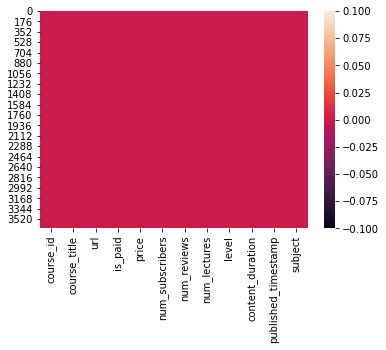

In [8]:
# Visualize if null values in seaborn
sns.heatmap(df.isna())

In [9]:
#Check for duplicates in the dataset
dup = df.duplicated().any()
print("Any duplicated values? ", dup)


Any duplicated values?  True


In [10]:
# How many duplicated values
Total_dup = df.duplicated().sum()
print("The total diplicated values are: ", Total_dup)

The total diplicated values are:  6


In [11]:
# Drop the duplicated values
df = df.drop_duplicates()


In [12]:
# check if duplicated values dropped or not
dup = df.duplicated().any()
print("Any duplicated values? ", dup)

Any duplicated values?  False


In [13]:
# Drop the url column
df.drop(["url"], axis=1, inplace=True)

In [14]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [15]:

df.columns


Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [16]:
# Find the number of courses per subject
df["subject"].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

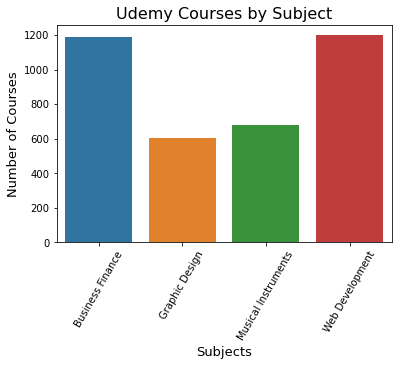

In [17]:
# Visualize the number of courses per subject
sns.countplot(x= "subject", data=df)
plt.title("Udemy Courses by Subject", fontsize=16)
plt.xlabel("Subjects", fontsize=13)
plt.ylabel("Number of Courses", fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [18]:
# Find the Total number of courses offered by Udemy
Tot_courses = df['course_title'].value_counts().sum()
print("The total courses offered by Udemyare: ",Tot_courses)

The total courses offered by Udemyare:  3672


In [19]:
# Find the number of field of expertise
Tot_subjects = df["subject"].unique()
print("Udemy offers", len(Tot_subjects), " subject domains")

Udemy offers 4  subject domains


In [20]:
# List the name of the subjects
print("Udemy offers these subjects: ", df["subject"].unique())

Udemy offers these subjects:  ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [21]:
# How many levels does Udemy provide
df["level"].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

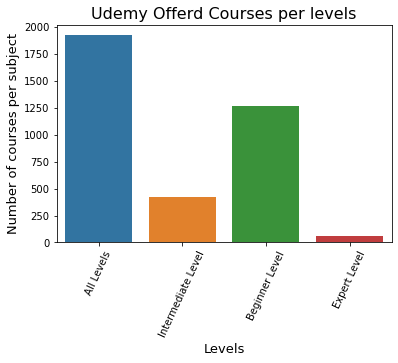

In [22]:
# Visualize the levels
sns.countplot(x= df['level'])
plt.title("Udemy Offerd Courses per levels",fontsize=16)
plt.xlabel("Levels", fontsize=13)
plt.ylabel("Number of courses per subject", fontsize=13)
plt.xticks(rotation=65)
plt.show()

In [23]:
# Find the paid courses and free courses
df["is_paid"].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

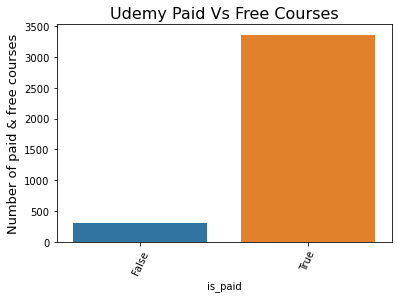

In [24]:
# Visualize the number of paid courses and free courses
sns.countplot(x= df["is_paid"])
plt.title("Udemy Paid Vs Free Courses",fontsize=16)
#plt.xlabel("paid & Free", fontsize=13)
plt.ylabel("Number of paid & free courses", fontsize=13)
plt.xticks(rotation=65)
plt.show()

In [25]:
# Which course has more lecture (Paid or free)
df.groupby("is_paid").mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


In [26]:
# Which course has more number of subscribers (Paid or free)
df.groupby("is_paid")["num_subscribers"].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

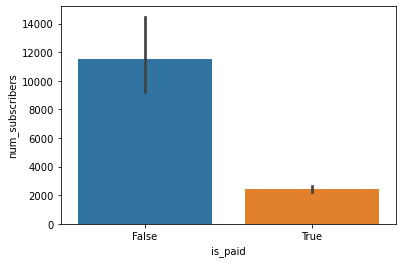

In [27]:
#Visualize the number of subscribers
sns.barplot(x= "is_paid", y = "num_subscribers", data= df)

In [28]:
# Which level has more num of subscribers
df.groupby("level").mean().sort_values(by='num_subscribers', ascending=False)

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
level,,,,,,,
All Levels,649372.988571,0.936623,73.090909,3569.761558,209.751688,46.030649,4.874000
Beginner Level,699269.822555,0.875394,55.737382,3195.459779,101.794164,33.022082,3.094401
Intermediate Level,722689.942993,0.928741,61.923990,1762.482185,92.674584,35.935867,3.733333
Expert Level,705633.517241,1.000000,91.120690,865.448276,40.224138,30.775862,2.905460


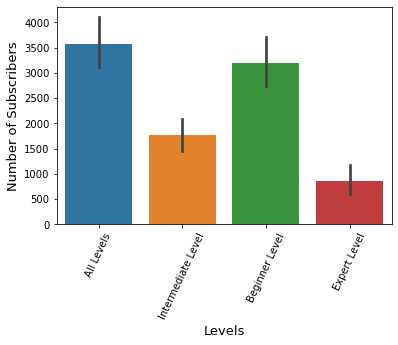

In [29]:
# Visualize the number of subscribers by level
sns.barplot(x= "level", y= "num_subscribers", data=df)
plt.xlabel("Levels", fontsize=13)
plt.ylabel("Number of Subscribers", fontsize=13)
plt.xticks(rotation=65)
plt.show()

In [30]:
# Find the most popular course title
df[df["num_subscribers"].max() == df["num_subscribers"]]["course_title"]

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [31]:
# Find top 10 popular courses by the num of subscribers
Top_10 = df.sort_values(by="num_subscribers", ascending=False).head(10)

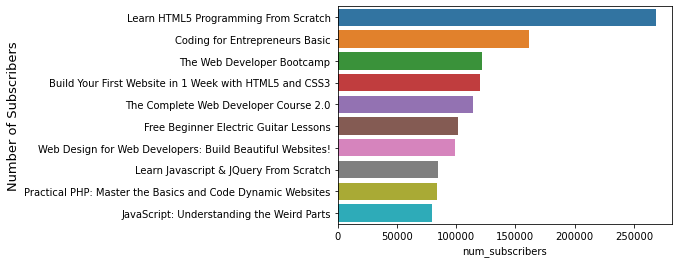

In [32]:
#Visualize Top 10 popular courses
sns.barplot(y= "course_title", x= "num_subscribers", data=Top_10)
plt.ylabel("Course Title", fontsize=13)
plt.ylabel("Number of Subscribers", fontsize=13)
#plt.xticks(rotation=60)
plt.show()

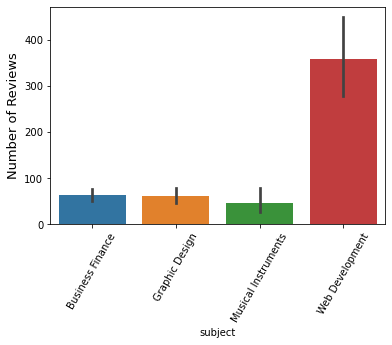

In [33]:
# Which subject has the highest num of reviews
sns.barplot(x = "subject", y = "num_reviews", data=df)
plt.ylabel("Subject", fontsize=13)
plt.ylabel("Number of Reviews", fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [34]:
# Which course has the highest num of reviews
df[df["num_reviews"].max() == df["num_reviews"]]['course_title']

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

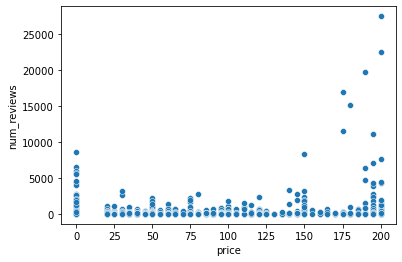

In [35]:
# Does price affect the num of reviews
sns.scatterplot(x="price", y="num_reviews", data=df)
#plt.figure(figsize=(15,6))

In [36]:
# Find the total num of courses related to python 
Python = df[df["course_title"].str.contains("python", case=False)]
print("Udemy offers",{len(Python)}, "courses related to python")

Udemy offers {29} courses related to python


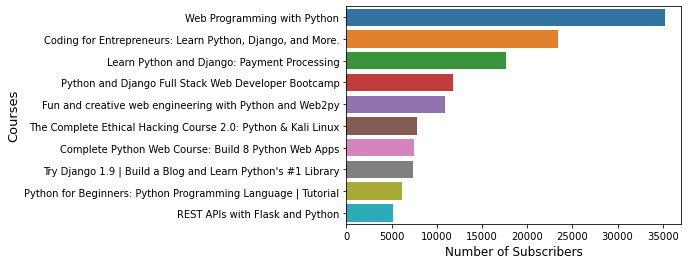

In [37]:
# find the top 10 most popular python courses per num of subscribers
py_top10 = df[df["course_title"].str.contains("python", case=False)].\
sort_values(by="num_subscribers", ascending=False).head(10)

#visuilze the top10 courses
sns.barplot(y = "course_title", x = "num_subscribers", data=py_top10)
plt.ylabel("Courses", fontsize=13)
plt.xlabel("Number of Subscribers", fontsize=12)
#plt.xticks(rotation=60)
plt.show()

In [38]:
# which year has the highest number of courses posted
df["year"] = df["published_timestamp"].dt.year
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


<AxesSubplot:xlabel='year', ylabel='count'>

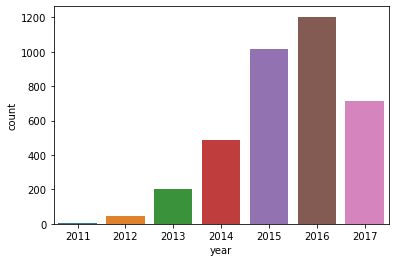

In [39]:
sns.countplot(x="year", data=df)

In [40]:
# display catagory wise count subject posted {year, subject, count}
df.groupby("year")["subject"].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64